# CS4055 Project Group 7

# Notebook 1 - EDA and Data Preparation

===================================================================================================================

# 1 - Introduction

## a) Group Members

__Enda McCarthy (19159269)__ 

    25% - EDA, Clustering & Feature Selection/Predictive Modelling (kNN)

__Denisio Togashi (15195147)__

    25% - EDA, Feature Selection/Predictive Modelling (SVC) & Evaluation of Model

__Griselda Williams (19290128)__

    25% - EDA, Binary Target Investigation & Feature Selection/Predictive Modelling (Random Forest)

__Richard Moloney (16195434)__

    25% - EDA & Feature Selection/Predictive Modelling (Linear SVC)
    
The Group came together regularly to consolidate their findings, analyse the results, and to finalise the documentation.


## b) Dataset Choice

The dataset contains information collected from two Portuguese secondary schools about students who are studying the Portuguese language.

The information collected relates to the students personal and academic lives and was collected during the 2005-2006 school year.

The target attribute if called '__G3__'. This is the students final grade for the subject.

There are 649 rows in the dataset.

The source of the data is: Paulo Cortez, University of Minho, Guimaraes, Portugal, http://www3.dsi.uminho.pt/pcortez

__Why we chose this dataset:__

We chose this dataset becuase education was a sector that we could all relate to, enabling us to better understand the relationship between features, and their potential impact on our target outcomes.

__N.B.__ 

In this notebook we use 'students.csv' which has values artificially removed. This is so we can demonstrate how to approach dealing with missing data. In Notebooks 2 and 3 we will use 'studentPor.csv', the original dataset which has no missing values. We begin Notebooks 2 and 3 by removing the outliers, even though we have demonstrated and analysed outlier removal in detail already in Notebook 1.


## c) Project Documentation

We are sumbitting a zip file with __3 sub folders__:

- EDA_AND_DATAPREP
- PREDICTIVE_MODELS
- CLUSTERING

Each subfolder contains the Jupyter notebook, the relevant CSV files and any images linked in the notebook.


## d) Application of Lab Work

- Lab 2 - EDA (Notebook 1)
- Lab 3 - Data preparation (Notebook 1)
- Lab 4 - Model evaluation (Notebook 2)
- Lab 5 - Feature selection & predictive modelling (Notebook 2)
- Lab 6 - Clustering (Notebook 3)


## e) Project Demonstration

Group 7 gave a demonstration of our work in progress on Friday 15th November (week 10).

===================================================================================================================

# 2 - EDA

## a) Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [2]:
# dataset with values articicially removed
df = pd.read_csv('./students.csv')
# description of dataset
df_info = pd.read_csv('./student_dataset_info.csv')

__Figure 1 - Dataset Info__

In [3]:
df_info
df_info.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')]),
                                dict(selector='td', props=[('text-align', 'left')])])

,Attribute,Description,Type,Values
0,School,Student’s School,Binary,GP (Gabriel Pereira) or MS (Mousinho da Silveira)
1,Sex,Student’s Sex,Binary,F or M
2,Age,Student’s Age,Numeric,15 to 22
3,Address,Student’s Home Address Type,Binary,U (urban) or R (rural)
4,FamSize,Family Size,Binary,LE3 (less or equal to 3) or GT3 (greater than 3)
5,Pstatus,Parent’s Cohabitation Status,Binary,T (living together) or A (apart)
6,Medu,Mother’s Education,Numeric,"0 (none), 1 (lower primary), 2 (higher primary), 3 (secondary education) or 4 (higher education)"
7,Fedu,Father’s Education,Numeric,"0 (none), 1 (lower primary), 2 (higher primary), 3 (secondary education) or 4 (higher education)"
8,Mjob,Mother’s Job,Nominal,"teacher, health, services, at_home, other"
9,Fjob,Father’s Job,Nominal,"teacher, health, services, at_home, other"


## b) Data Exploration

__Figure 2 - First Half Head__

In [4]:
# show head of first half of feature columns
df.iloc[:,0:16].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,course,mother,2,2,0.0,yes
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,course,father,1,2,0.0,no
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,other,mother,1,2,0.0,yes
3,GP,F,15,U,GT3,T,4.0,2,health,services,home,mother,1,3,0.0,no
4,GP,F,16,U,GT3,T,3.0,3,other,other,home,father,1,2,0.0,no


__Figure 3 - Second Half Head__

In [5]:
# show head of second half of feature columns
df.iloc[:,16:].head()

,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,no,no,NaN,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,yes,no,NaN,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


__Figure 4 - First Half Tail__

In [6]:
# show tail of first half of feature columns
df.iloc[:,0:16].tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup
644,MS,F,19,R,GT3,T,NaN,3,services,other,course,mother,1,3,1.0,no
645,MS,F,18,U,LE3,T,3.0,1,teacher,NaN,course,mother,1,2,0.0,no
646,MS,F,18,U,GT3,T,NaN,1,other,other,course,mother,2,2,0.0,no
647,MS,M,17,U,LE3,T,3.0,1,services,services,course,mother,2,1,0.0,no
648,MS,M,18,R,LE3,T,3.0,2,services,other,course,mother,3,1,0.0,no


__Figure 5 - Second Half Tail__

In [7]:
# show tail of second half of feature columns
df.iloc[:,16:].tail()

,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,no,no,NaN,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


We can also look the total dataset structure in more detail by apply the folowing code:

In [8]:
def rstr(df): return df.shape, df.apply(lambda x: [x.unique()])
rstr(df)

((649, 33), school                                               [[GP, MS]]
 sex                                                    [[F, M]]
 age                          [[18, 17, 15, 16, 19, 22, 20, 21]]
 address                                                [[U, R]]
 famsize                                            [[GT3, LE3]]
 Pstatus                                           [[A, T, nan]]
 Medu                           [[4.0, 1.0, 3.0, 2.0, nan, 0.0]]
 Fedu                                          [[4, 1, 2, 3, 0]]
 Mjob              [[at_home, health, other, services, teacher]]
 Fjob          [[teacher, other, services, nan, health, at_ho...
 reason                 [[course, other, home, reputation, nan]]
 guardian                              [[mother, father, other]]
 traveltime                                       [[2, 1, 3, 4]]
 studytime                                        [[2, 3, 1, 4]]
 failures                            [[0.0, nan, 3.0, 1.0, 2.0]]
 schoolsup    

The command .info() is also very useful because give information about column data types.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       613 non-null object
Medu          620 non-null float64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          582 non-null object
reason        586 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      552 non-null float64
schoolsup     649 non-null object
famsup        597 non-null object
paid          649 non-null object
activities    519 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          64

We can see that the dataset has **649** data rows, and **33** atrributes. The data rows are typically called *observations*, *examples* or *instances*, and the columns are also called *attributes* or *features*. See the features acronynms in Figure 1 above.

Ordinal features, i.e., categorical features that have an order associated to them, will be considered as numerical attributes. The remainder are the categorical with nominal features (or dtypes object, which number 17 in total). Later on, these categorial features will be processed into numbers (numerical form) to enable them to be used in some learning models. 

Also, note the presence of *NaN* values in some of categorical attributes in this small overview of the data set.

**Note:** the *NaN* values were deliberated imputed in the dataset in order to simulate such a situation. 

__Figure 6 - Statistical summary for all numerical attributes__

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,620.000000,649.000000,649.000000,649.000000,552.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.504839,2.306626,1.568567,1.930663,0.219203,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.130418,1.099931,0.748660,0.829510,0.594097,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


There are a few observations from the output of `describe()`:

- Missing data appears in 'Medu' (29) and 'failures' (97). 
- Note that we do not know about non-numerical data atributes.
- all numeric data are positive numbers

__Missing Values:__

A more effective way to find the total complement of missing values is to view the sum of each NULL of NaaN data instance for each feature using `isnull()`:

In [11]:
df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus        36
Medu           29
Fedu            0
Mjob            0
Fjob           67
reason         63
guardian        0
traveltime      0
studytime       0
failures       97
schoolsup       0
famsup         52
paid            0
activities    130
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

The features, both numeric and categorical, that have missing data are: 'Pstatus'(36), 'Medu'(29), 'Fjob'(67), 'reason'(63), 'failures'(97), 'famsup'(52), 'activities'(130).

The impact of such missing data within each feature can be determined by their percentage distribution.

__Percentage of Missing Values:__

In [12]:
round(df.apply(lambda x: x.isnull().sum()/len(x)*100, axis=0),)

school         0.0
sex            0.0
age            0.0
address        0.0
famsize        0.0
Pstatus        6.0
Medu           4.0
Fedu           0.0
Mjob           0.0
Fjob          10.0
reason        10.0
guardian       0.0
traveltime     0.0
studytime      0.0
failures      15.0
schoolsup      0.0
famsup         8.0
paid           0.0
activities    20.0
nursery        0.0
higher         0.0
internet       0.0
romantic       0.0
famrel         0.0
freetime       0.0
goout          0.0
Dalc           0.0
Walc           0.0
health         0.0
absences       0.0
G1             0.0
G2             0.0
G3             0.0
dtype: float64

So the missing values for 'Fjob', 'reason' 'failures', and 'activities' represent approximately more than 10% of their own data. Also, note except for 'Medu' and 'failures', all the other missing data are presented in nominal features.

## c) Distribution Analysis for Numerical Attributes

__Figure 7 - Histogram for all numeric attributes__

[]

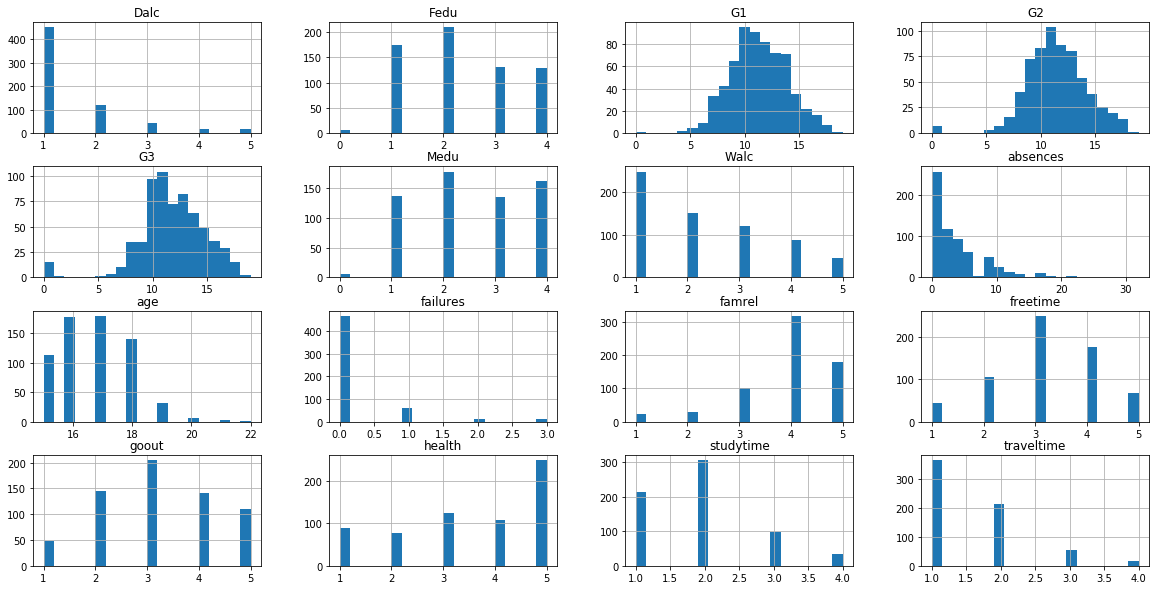

In [13]:
# plotting a histogram for all numeric attributes:

df.hist(bins=20,figsize=(20,10))
plt.plot()

From the histograms above, we can highlight that:

* G1, G2 and G3 has normal distribution with G3 slightly right skewed.  
* 'absence' presents an exponential distribution.
* Not much difference between parents education indicated by 'Fedu' and 'Medu' attributes.
* Similar trends appear between alcohol consumption on workdays (Dalc) and on weekends (Walc).
* A slightly right skewed normal distribution for 'age' with a expected mean of 17 years-old.
* Majority of students have not failed classes in the past, as indicated by 'failures'
* The family quality (famrel) relationship presented a left skewed histogram, i.e., towards excelent.
* 'health' also slightly left skewed histogram
* 'freetime', 'studytime' and 'goout' (indicating frequency students socialise with friends) seems to follow a normal distribution.
* Majority of the students live near the school, as illustrated by 'traveltime'.


We can also perform boxplots to better understand the distribution of the numerical data:

__Figure 8 - Boxplots of Distribution__

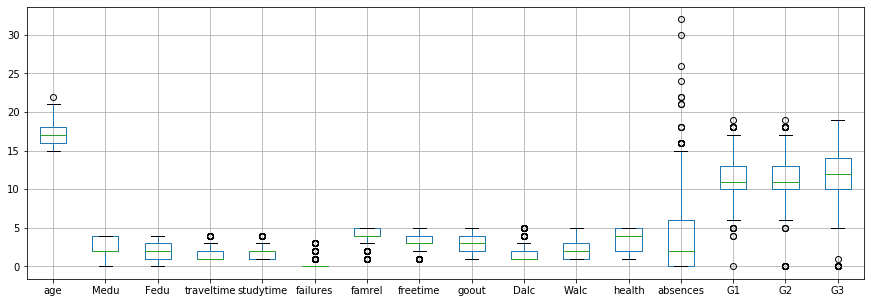

In [14]:
# Next, we look at boxplots to understand the distribution better.

df.boxplot(figsize=(15,5))

The boxplot above confirms the presence of outliers on the majority of features. The outiliers are more accentuated in the 'absences' attribute.

Let us concentrate on 'G1', 'G2' and 'G3'.

__Figure 9 - Boxplots of G1, G2 & G3__

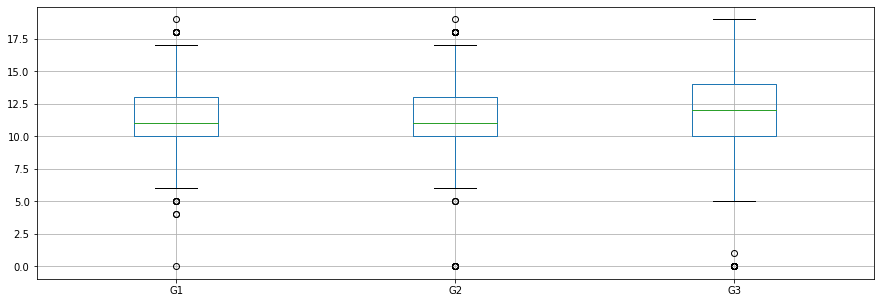

In [15]:
df.boxplot(figsize=(15,5),column=['G1','G2','G3'])

We note that the median for 'G3' is higher thant 'G1' and 'G2'. However, 'G3' seems also to have higher variance.

Now let's examine if we can find some relationship between the attributes with a scatter plot, by using `scatter_matrix` from pandas.

__Figure 10 - Scatter Matrix of ALL Features__

Text(0.5, 0.98, '')

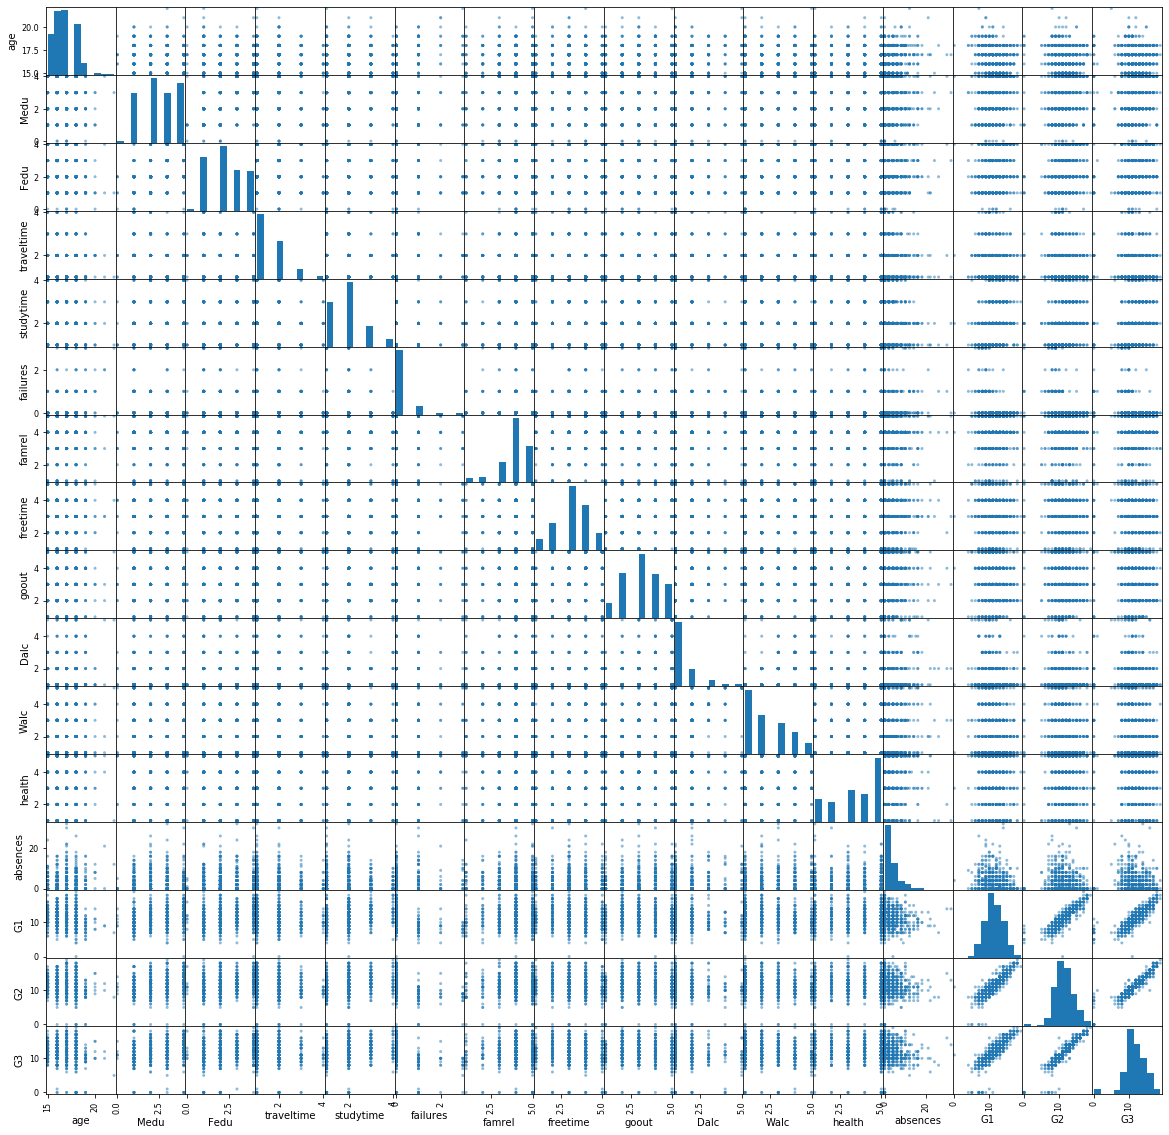

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20))
plt.suptitle("") 

All possible combinations are on 'off-diagonal'. The diagonal plots are the respective histograms of the attributes. Note that the grades are high in each instance.

Whilst this grid gives us an insight into paired combinations of features, it is only 2 dimensional. Once we want to start exploring which combinations of features have the most significant inpact on our target result, we will need to use Machine Learnign Feature Selection Algorithms (section 3).

## d) Distribution Analysis for Categorical Nominal Attributes

Here we are analysing the categorical features that are not ordered, or nominal attributes. 
Let's extract them from the dataset by creating a new dataset called cat_df. 
To do this we use the method .copy()

In [17]:
cat_df = df.select_dtypes(include=['object']).copy()

__Figure 11 - Head of cat_df dataframe__

In [18]:
cat_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,NaN,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,NaN,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


__Missing Values in cat_df dataframe:__

In [19]:
cat_df.isnull().sum()

school          0
sex             0
address         0
famsize         0
Pstatus        36
Mjob            0
Fjob           67
reason         63
guardian        0
schoolsup       0
famsup         52
paid            0
activities    130
nursery         0
higher          0
internet        0
romantic        0
dtype: int64

__Figure 12 - Categorical Data in cat_df dataframe__

In [20]:
cat_df[0:5]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,NaN,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,NaN,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


__Figure 13 - Histogram of Categorical Data in cat_df dataframe__

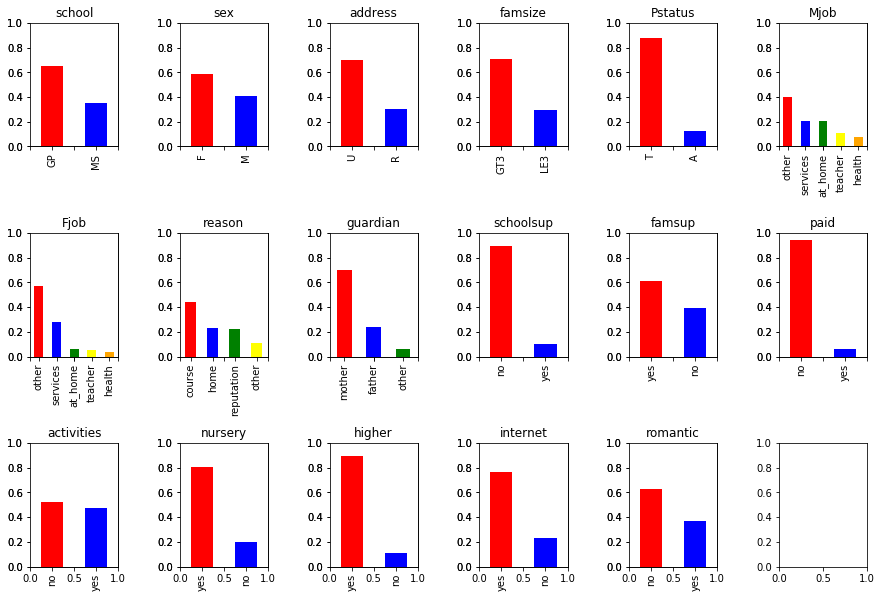

In [21]:
categoricalList = cat_df.columns.tolist()

fig, axs = plt.subplots(3,6, sharex='row', figsize=(15, 10))
fig.subplots_adjust(hspace = 0.7, wspace=0.7)

num=1
for attribute in categoricalList:
    ax = fig.add_subplot(3,6,num)
   
    values = cat_df[attribute].value_counts()/cat_df[attribute].count()
    values.plot.bar( color=['red', 'blue', 'green', 'yellow', 'orange', 'purple'] )
    num+=1

    ax.set_title(attribute)
    plt.ylim(0,1)  

By analysing the bar chart from the categorical data we can observe that, the student profile in the dataset is:

<pre>
~60% is GP school
~60% is Female
~70% live in Urban areas
~70% have a family size > 3
~80% have parents living together
~70% have a Mother as a guardian
~90% do not get extra education support from the school
~60% get support from their family
~95% do not pay for extra classes within the course subject
~45% do participate in extra-curricular activities
~80% attended nursery school
~90% want to go into higher education
~80% have internet access at home
~60% are not in a romantic relationship
+40% of the Father and Mother jobs belong to the 'other' classification 
</pre>

===================================================================================================================


# 3 - Data Preparation

## a) Missing Data

In this section we will deal with the missing data. 

There are different methods that we can apply which include:
- removing the instances (rows) that contains the missing data
- filling with the most frequent data or with the average value
- or using prediction methods to predict the missing values based on the other attributes

We used 2 approaches to fill the missing data, and we will examine both in this section.

__APPROACH 1__

In our first approach, we are going to use the replacement by the most_frequent value since the majority of our categorical data is nominal, i.e., only 'Medu' and 'failures' are numerical.

The new dataframe, with all missing values filled, will be called 'newDf'.


__APPROACH 2__

In our second approach, we are going to look to see if any trends exist between the features with missing data, and any other features, to see if they can be used to determine the missing values.

The new dataframe with these misisng values filled, will be called 'new2Df'.

### APPROACH 1

New Database with Missing Values Filled:

In [22]:
# filling missing data with the mean for numerical attribute
newDf = df
newDf['Medu'].fillna(np.trunc(df['Medu'].mean()), inplace=True)
newDf['failures'].fillna(np.trunc(df['failures'].mean()), inplace=True)

# getting the values only
temp = newDf.loc[:,:].values 

# filling the matrix with the most frequent value
imputer_most_frequent = SimpleImputer(strategy = "most_frequent")
imputer_most_frequent.fit(temp)
temp = imputer_most_frequent.transform(temp)

# converting to dataframe
pd.DataFrame(temp)
newDf = pd.DataFrame(temp, columns=df.columns.tolist())

Checking if all the values have filled:

In [23]:
newDf.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Since, we used the most frequent values to fill the missing data, we need to check if we have any major changes in the numerical attributes for 'Medu' and 'failures' by Mean and Variance:

In [24]:
print(round(df['Medu'].mean(),2),'+/-',round(df['Medu'].var(),2))

2.48 +/- 1.23


In [25]:
print(round(newDf['Medu'].mean(),2),'+/-',round(newDf['Medu'].var(),2))

2.48 +/- 1.23


In [26]:
print(round(df['failures'].mean(),2),'+/-',round(df['failures'].var(),2))

0.19 +/- 0.31


In [27]:
print(round(newDf['failures'].mean(),2),'+/-',round(newDf['failures'].var(),2))

0.19 +/- 0.31


__Figure 14 - Checking New Database against Original Database  - 'Medu' feature__

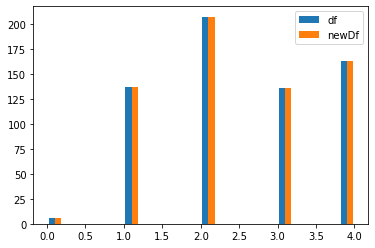

In [28]:
plt.hist([df['Medu'],newDf['Medu']], bins=20, label=['df','newDf'], stacked=False)
plt.legend(loc='upper right')
plt.show()

__Figure 15 - Checking New Database against Original Database - 'failure' feature__

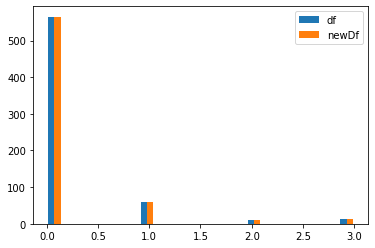

In [29]:
plt.hist([df['failures'],newDf['failures']], bins=20, label=['df','newDf'])
plt.legend(loc='upper right')
plt.show()

It seems that filling the missing values with the most frequent values does not have great impact on the final results.

### APPROACH 2

We will try to fill in what looks to be the easier attributes first. 

__`failures`__

There is a total of 97 missing values for past class failures. The attribute contains a numeric value between 0-4. Let's look at the counts of each value.

In [30]:
new2Df = df
new2Df.failures.value_counts()

0.0    565
1.0     60
3.0     13
2.0     11
Name: failures, dtype: int64

This tells us that the vast majority of students have 0 failures. As the dataset is relatively small we could just fill in all our missing values with 0, but let's try going one step further to get a little bit more accuracy.

One thing we can do for failures is to compare it to the final grade. We would expect students with a low final grade to have at least 1 failure.

__Figure 16 - G3 v failures__

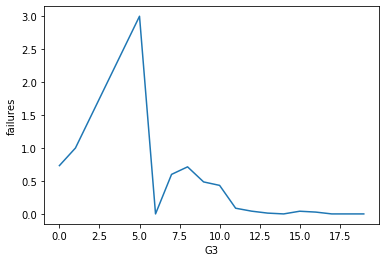

In [31]:
sns.lineplot(x="G3", y="failures", data=new2Df, ci=None)

From this we can see that the majority of students who have at least 1 failure seem to have a grade less than 5. We can double check this by getting the counts for a grade less than 5.

In [32]:
new2Df.failures[df['G3'] <= 5].value_counts()

0.0    7
1.0    7
3.0    2
2.0    1
Name: failures, dtype: int64

The majority of students who have a grade less than 5 have 1 failure (at least). We can now determine that students with grades less than 5 have 1 failure and students with grade greater than 5 will have 0 failures.

We can fill in the missing values as per this conclusion.

In [33]:
new2Df.loc[(df['G3'] > 5) & (new2Df['failures'].isnull()), 'failures'] = 0
new2Df.loc[(df['G3'] <= 5) & (new2Df['failures'].isnull()), 'failures'] = 1

__`Medu`__

There is a total of 29 missing values for mother's education. Again this a numeric attribute between 0-4. Let's get the counts for each value.

In [34]:
new2Df.Medu.value_counts()

2.0    207
4.0    163
1.0    137
3.0    136
0.0      6
Name: Medu, dtype: int64

We can see that there is a relatively even distibution across all the values bar 0.

The first thing we can do for Medu is to look at it in terms of the mother's job.

__Figure 17 - Medu v Mjob__

In [35]:
new2Df_Medu = pd.crosstab(new2Df.Medu, new2Df.Mjob)
new2Df_Medu

Mjob,at_home,health,other,services,teacher
Medu,,,,,
0.0,3,0,3,0,0
1.0,64,2,65,6,0
2.0,43,8,103,49,4
3.0,20,5,56,52,3
4.0,5,33,31,29,65


This tells us the following about a mothers job and her likely education value:
- at home - 1
- health - 4
- other - 2
- services - 3
- teacher - 4

Now we can fill in the missing values based on the above.

In [36]:
new2Df.loc[(new2Df['Mjob'] == 'at_home') & (new2Df['Medu'].isnull()), 'Medu'] = 1
new2Df.loc[(new2Df['Mjob'] == 'other') & (new2Df['Medu'].isnull()), 'Medu'] = 2
new2Df.loc[(new2Df['Mjob'] == 'services') & (new2Df['Medu'].isnull()), 'Medu'] = 3
new2Df.loc[(new2Df['Mjob'] == 'health') & (new2Df['Medu'].isnull()), 'Medu'] = 4
new2Df.loc[(new2Df['Mjob'] == 'teacher') & (new2Df['Medu'].isnull()), 'Medu'] = 4 

__`activities`__

There is a total of 130 missing values for extra curricular activities. This is a binary attribute with 'yes' and 'no' values. Let's look at the counts for both.

In [37]:
new2Df.activities.value_counts()

no     272
yes    247
Name: activities, dtype: int64

Again the distribution is close for both values. Let's check how the students free time correalates with activities.

__Figure 18 - freetime v activities__

In [38]:
new2Df_activities = pd.crosstab(new2Df.freetime, new2Df.activities)
new2Df_activities

activities,no,yes
freetime,,
1,29,9
2,48,38
3,96,93
4,81,71
5,18,36


This tells us that a student with a free time value of 1 is __not likely__ do any activities, while a student with a freetime value of 5 __is likely__ to do activities. We cannot make a judgement on values in between as they are too close to call.

We can fill partially fill in missing values based on this.

In [39]:
new2Df.loc[(new2Df['freetime'] == 1) & (new2Df['activities'].isnull()), 'activities'] = "no"
new2Df.loc[(new2Df['freetime'] == 5) & (new2Df['activities'].isnull()), 'activities'] = "yes"

Now we need to fill in the remaining missing values for activities. Let's look at the students final grades compared to their activities.

__Figure 19 - G3 v activities__

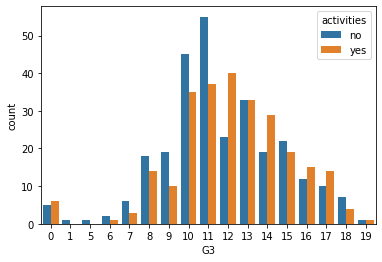

In [40]:
sns.countplot(x="G3", hue="activities", data=new2Df)

There would appear to be a trend whereby students with a final grade of 11 or less do not partake in activities while students with grades above 11 do partake. Let's double check this.

In [41]:
new2Df.activities[df['G3'] <= 11].value_counts()

no     152
yes    106
Name: activities, dtype: int64

In [42]:
new2Df.activities[df['G3'] > 11].value_counts()

yes    155
no     127
Name: activities, dtype: int64

We can conclude that the above assumption is correct and fill in the missing values accordingly.

In [43]:
new2Df.loc[(new2Df['G3'] <= 11) & (new2Df['activities'].isnull()), 'activities'] = "no"
new2Df.loc[(new2Df['G3'] > 11) & (new2Df['activities'].isnull()), 'activities'] = "yes"

__`Fjob`__

There is a total of 67 missing values for father's job. This is a nominal attribute with 5 differant values. Let's look at the counts for them.

In [44]:
new2Df.Fjob.value_counts()

other       332
services    161
at_home      35
teacher      33
health       21
Name: Fjob, dtype: int64

The majority of entries belong to 'other'. Now we can look at it in terms of the father's education. This is a similar approach to mother's education above except the opposite way around.

__Figure 20 - Fedu v Fjob__

In [45]:
new2Df_Fjob = pd.crosstab(new2Df.Fedu, new2Df.Fjob)
new2Df_Fjob

Fjob,at_home,health,other,services,teacher
Fedu,,,,,
0,1,0,4,0,0
1,13,0,102,41,1
2,14,3,122,54,0
3,6,3,63,39,1
4,1,15,41,27,31


This tells us that no matter what education value the father has, the most common job is 'other'.

We can fill in the missing values based on this.

In [46]:
new2Df.loc[(new2Df['Fjob'].isnull()), 'Fjob'] = 'other'

__`reason`__

There is a total of 63 missing values for the students reason for choosing the school. This is a nominal attribute with 4 differant values. Let's look at the counts for them.

In [47]:
new2Df.reason.value_counts()

course        258
home          136
reputation    130
other          62
Name: reason, dtype: int64

It is very difficult to try make an educated guess for why the student choose the school. In this case we are better off to pick the most popular option ('course') and fill in accordingly.

In [48]:
new2Df.loc[(new2Df['reason'].isnull()), 'reason'] = 'course'

__`famsup`__

There is a total of 52 missing values for whether the students family receives support. This is a binary attribute with 'yes' and 'no' values. Let's look at the counts for them.

In [49]:
new2Df.famsup.value_counts()

yes    364
no     233
Name: famsup, dtype: int64

Again this is a difficult attribute to guess. We are better off going with the most popular option ('yes').

In [50]:
new2Df.loc[(new2Df['famsup'].isnull()), 'famsup'] = 'yes'

__`Pstatus`__

There is a total of 36 missing values for parents living situation. This is a binary attribute with 'T' (living together) and 'A' (living apart) values. Let's look at the counts for them.

In [51]:
new2Df.Pstatus.value_counts()

T    536
A     77
Name: Pstatus, dtype: int64

The vast majority (87%) of parents live together. We can fill in the filling values with 'T'.

In [52]:
new2Df.loc[(new2Df['Pstatus'].isnull()), 'Pstatus'] = 'T'

## b) Comparison of Missing Data Approaches

We will measure the differences between the original data (without missing values) and the data with imputed missing values for both approaches.

__Function used to measure differences:__

In [53]:
# pass in 3 dataframes
    # 1. the original without any missing values
    # 2. the one with the values removed
    # 3. the one with the values filled back in again
    
def get_accuracy_filled_in_data(df_original_no_missing_values, df_with_values_missing, df_with_values_filled_in):
    counter = 0
    for row in range(df_with_values_missing.shape[0]):
        for col in range (df_with_values_missing.shape[1]):
            if df_original_no_missing_values.iloc[row][col] != df_with_values_filled_in.iloc[row][col]:
                counter += 1
    return (100 * (1 - counter/df_with_values_missing.isnull().sum().sum()))

__Reload untouched datasets:__

In [54]:
# the original dataset without any missing values
df_original_no_missing_values = pd.read_csv('./studentPor.csv')
# the dataset with the values removed
df_with_values_missing = pd.read_csv('./students.csv')

__Accuracy of APPROACH 1:__

In [55]:
get_accuracy_filled_in_data(df_original_no_missing_values, df_with_values_missing, newDf)

59.07172995780591

__Accuracy of APPROACH 2:__

In [56]:
get_accuracy_filled_in_data(df_original_no_missing_values, df_with_values_missing, new2Df)

61.60337552742617

### Conclusion:

Both approaches used to fill the missing values resulted in approximately 60% accuracy relative to the original values.

Therefore we can conclude that APPROACH 1 is the better option is it takes less work.

If a higher accuracy is required then an option would be to actually train a machine learning algorithm to fill in missing data.

## c) Outliers

As observed in the EDA, the main attribute that presented a large number of outliers was'absences'.

In [57]:
# need to convert to numerical
newDf['absences']=newDf['absences'].astype(int)

__Figure 21 - Absences Boxplot__

Text(0.5, 1.0, 'Absences Boxplot')

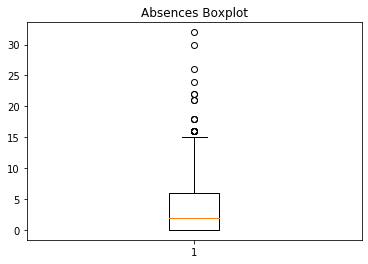

In [58]:
plt.boxplot(newDf['absences'])
plt.title('Absences Boxplot')

In [59]:
Q1 = newDf['absences'].quantile(0.25)
Q3 = newDf['absences'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6.0


https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

The interquartile range (IQR) is considered as statistcal spread of the values or variance, which is calculated by the difference between 1/4 and 3/4 percentiles, or IQR = Q3 - Q1.

The whiskers in the boxplot are, in general, 1.5 times the inter-quartile range, and any value out of this range is consered as an outlier.

Thus, we can remove the outliers by:

In [60]:
newDf['iqr']=(newDf['absences'] < (Q1 - 1.5 * IQR)) |(newDf['absences'] > (Q3 + 1.5 * IQR))

newDfNoOutliers=newDf[newDf.iqr != True]

newDfNoOutliers=newDfNoOutliers.drop('iqr', axis=1)

__Figure 22 - Absences With Outliers Removed Boxplot__

Text(0.5, 1.0, 'absences')

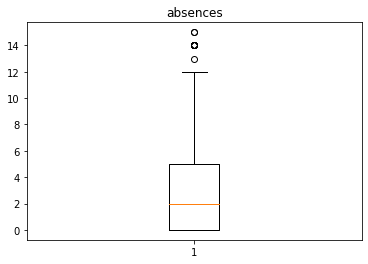

In [61]:
plt.boxplot(newDfNoOutliers['absences'])
plt.title('absences')

In [62]:
df['iqr']=(df['absences'] < (Q1 - 1.5 * IQR)) |(df['absences'] > (Q3 + 1.5 * IQR))

dfNoOutliers=df[df.iqr != True]

dfNoOutliers=dfNoOutliers.drop('iqr', axis=1)

+ Dataset with outliers ==>  newDf
+ Dataset without outliers ==>  newDfNoOutliers
+ Dataset with outliers without missing values (original) ==> df
+ Dataset (original) without outliers ==> dfNoOutliers

Whilst it is good practice to remove outliers from a database during the preparation phase, it is interesting to explore whether or not the outliers in this particular feature actually had any impact on our G3 target result, and to see which students were absent the most.


__Figure 23 - Absences With Outliers vs G3__

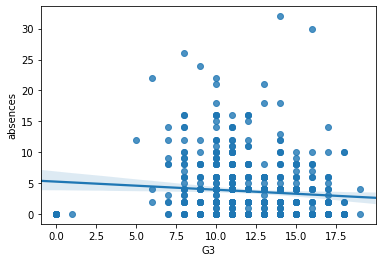

In [63]:
sns.regplot(x='G3', y='absences', data=df)

It is evident from this scatter chart that infact, the students who took the most time out of school were among the highest performing students in the class, and that students who never took any absence from school were among those who performed very badly.

Analysis of the following figure shows us that the students who belonged the the outlier group in 'absences' were primarily female.

However in addition to the scatter plot above, the violin plot in figure 25 below indicates that female students on average performed better than the male students, despite taking long absences from school.

__Figure 24 - Boxplot of absences grouped by sex__

Text(0.5, 0.98, '')

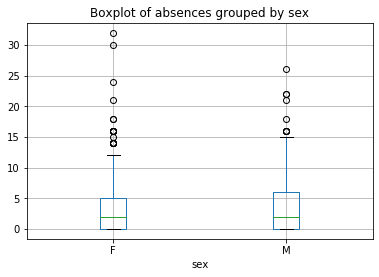

In [65]:
df.boxplot(column='absences', by='sex')
plt.title('Boxplot of absences grouped by sex')
plt.suptitle("")

__Figure 25 - G3 v sex__

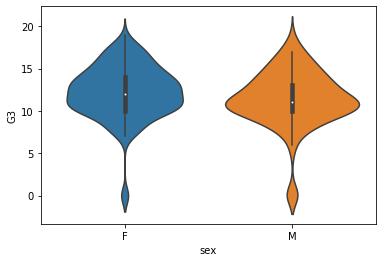

In [67]:
sns.violinplot(x='sex', y='G3', data=df)

## d) Possible New Features

When we try to explore multi-feature combinations to understand how combinations such as `sex` and `absence` affect the `G3` target, even after reducing the categories within `G3` down to 6 groups A, B, C, D, E & F, it is very hard to visualise this simply in a graph. 

In [68]:
#get the actual values for G3 and save to a numpy array
G3 = df["G3"].values

grade = []

#iterate through every G3 value and save the corresponding grade category to the grade array
for number in G3:
    if number >=17:
        grade.append('A') # grade = A
    elif number >= 15:
        grade.append('B') # grade = B
    elif number >= 13:
        grade.append('C') # grade = C
    elif number >= 11:
        grade.append('D') # grade = D
    elif number>= 8:
        grade.append('E') # grade = E
    else:
        grade.append('F') # grade = F
    
#convert the grade array to a pandas dataframe
grade = pd.DataFrame(data=grade, columns = ["grade"])
#create a new dataframe called data by joining grade with df_dummies
data = pd.concat([df, grade], axis = 1)

In [69]:
frequency_table = data['grade'].value_counts(ascending=True)
print('Frequency Table for grade:') 
print(frequency_table)

Frequency Table for grade:
F     30
A     46
B     85
C    145
E    167
D    176
Name: grade, dtype: int64


__Figure 26 - Final grade accross males and females__

Text(0, 0.5, 'Number of Students')

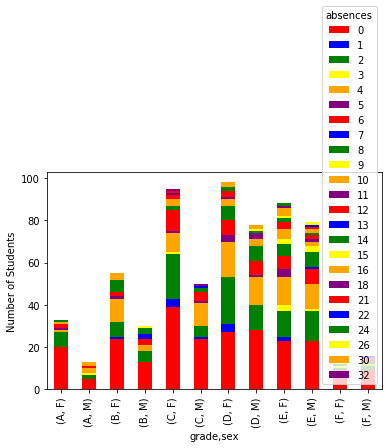

In [70]:
stacked_chart_gender = pd.crosstab([data['grade'], data['sex']], data['absences'])
stacked_chart_gender.plot(kind='bar', stacked=True, color=['red', 'blue', 'green', 'yellow', 'orange', 'purple'], grid=False)
plt.ylabel('Number of Students')

In the example above, we have attempted to manage the data in order to try and introduce multiple features.
As you can see from the bar chart, because our second feature also contains too many categories, there is too much data here to present a clean and easy to read visual graphic. 

Also, it is difficult for us to manually explore every combination of features to discover which feature combinations have the greatest impact on our predictor model, in an efficient way.

This is when we turn to feature selection algorithms to analyse combinations of features to find out which ones have the most significant impact on our predictor models.

This will be explored in Notebook 2.

===================================================================================================================